# Computational Exercise 1:  Linear Variational Principle

#### Objectives
- To demonstrate the use of the Linear Variational Method to the model system of the particle in a box with a delta potential
- To illustrate the impact of basis set size on the variational energy

#### Learning Outcomes
By the end of this workbook, students should be able to
- implement expressions for Hamiltonian matrix elements of the particle in a box with a delta function potential into simple python code
- encode a linear expansion of basis functions as a numpy array
- utilize numpy's matrix-vector operations to compute energy expectation values of different trial w
- utilize numpy's `eig` function to obtain eigenvalues and eigenvectors of the Hamiltonian matrix
- plot the variational ground-state wavefunction using `pyplot`


#### Summary
We will apply the Linear Variational Method to the particle in a box of length $10$ atomic units 
with a delta function potential centered at $x=5$ atomic units. We will plot the delta function potential 
in the next cell using the python library `matplotlib` and the special functio from the `scipy` library called
`signal.unit_impulse` that can create a delta function.




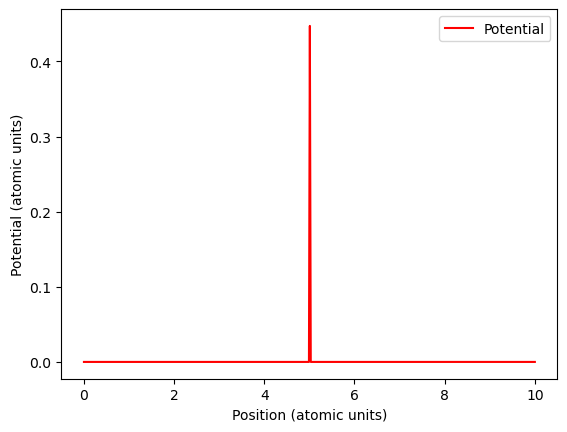

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

# create an array of x-values between 0 and 10
x = np.linspace(0, 10, 500)

# create the delta function potential.  Need to specify that it will be in the middle 
# of 500 samples along x.  We will scale this by the amplitude of the normalized energy 
# eigenstates so that this potential appears on the same scale as the eigenfunctions
V_x = scipy.signal.unit_impulse(500, idx='mid') * np.sqrt(2/10)

# now plot V_x against x
plt.plot(x, V_x, color='red', label="Potential")
plt.xlabel("Position (atomic units)")
plt.ylabel("Potential (atomic units)")
plt.legend()
plt.show()

# Approach
We can write the Hamiltonian for this system between $x=0$ and $x=10$ as follows:

$$\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \delta(x-5), $$
and we notice that this looks very similar to the Hamiltonian we know from the ordinary particle in a box
except for the presence of this peculiar spikey potential right in the middle of the box.  We could try to find [the exact eigenfunctions for this Hamiltonian](https://arxiv.org/pdf/1001.0311.pdf), but we can also obtain insights and reasonably good results utilizing approximate methods, such as the [Variational Method](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Quantum_Mechanics/17%3A_Quantum_Calculations/Variational_Method#:~:text=The%20Variational%20Method%20is%20a,the%20known%20and%20approximated%20energies) or [Perturbation Theory](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Book%3A_Quantum_States_of_Atoms_and_Molecules_(Zielinksi_et_al)/09%3A_The_Electronic_States_of_the_Multielectron_Atoms/9.03%3A_Perturbation_Theory).  Here we will use the Variational Method.

#### Form of the trial wavefunction
In particular, we will optimize the trial wavefunction given by 
\begin{equation}
\Phi(x) = \sum_{n=1}^N c_n \psi_n(x)
\end{equation}
where the expansion coefficients $c_n$ are real numbers
and $\psi_n(x)$ are the energy eigenfunctions of the ordinary particle in a box that has no potential
between $x=0$ and $x=L$.  In particular, these eigenfunctions have the form
\begin{equation}
\psi_n(x) = \sqrt{\frac{2}{10} } {\rm sin}\left(\frac{n \pi x}{10} \right).
\end{equation}

#### Form of the energy functional
We will seek to minimize the energy functional through the expansion coefficients, where the
energy functional can be written as
\begin{equation}
E[\Phi(x)] = \frac{\int_0^{10} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_0^{10} \Phi^* (x) \: \Phi(x) dx },
\end{equation}
where we have recognized that the boundaries of the box are at $x=0$ and $x=10$, so our range of integration
goes between these boundaries.

#### Atomic Units
We will express our Hamiltonian in atomic units where $\hbar = 1$ and $m = 1$, so we can write the Hamiltonian in 
this unit system as:
\begin{equation}
\hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + \delta(x-5).
\end{equation}


$E[\Phi(x)]$ can be expanded as
\begin{equation}
E[\Phi(x)] \sum_{n=1}^N \sum_{m=1}^N c^*_n c_m S_{nm} = \sum_{n=1}^N \sum_{m=1}^N c^*_n c_m H_{nm}
\end{equation}
where 
\begin{equation}
S_{nm} = \int_0^L \psi^*_n(x) \psi_m(x) dx = \delta_{nm}
\end{equation}
and
\begin{equation}
H_{nm} = \int_0^L \psi^*_n(x) \hat{H} \psi_m(x) dx. 
\end{equation}
In the equation for $S_{nm}$, $\delta_{nm}$ is called the Kronecker delta function, and it is equal to 1 if $n = m$ and 0 if $n \neq m$.
Because the particle in a box energy eigenfunctions are real functions, and because we specified we would use
real expansion coefficients, we can recognize that $c_n^* = c_n$ and $\psi_n^*(x) = \psi_n(x)$, so we 
will not use the complex conjugate notation going forward.

### Questions Part 1:
1. Work out a general expression for the integrals $H_{nm}$
2. Write a python function `Hamiltonian_matrix_element(n,m)` that takes the indices $n$ and $m$ and returns
the value of the integral $H_{nm}$.  Skeleton code for this function follows.  Two helper functions are provided: 
    - `def energy_eigenvalue(n, L, m)` that can provide the energy eigenvalues of the ordinary particle in a box for energy eigenstate $n$, length $L$, and mass $m$
    - `def energy_eigenfunction(n, L, x)` that can provide the value(s) of the energy eigenfunction of the ordinary particle in a box for energy eigenstate $n$ with length $L$ evaluated at x-value(s) $x$.
3. **(Bonus)** Show that differentiating the energy functional with respect to all coefficients and setting the derivative to zero results in the following set of equations:
\begin{equation}
\sum_n^N H_{nm} c_n = E[\Phi(x)] c_m
\end{equation}
This can be written as an eigenvalue equation
\begin{equation}
{\bf H} {\bf c} = E {\bf c},
\end{equation}
where ${\bf H}$ is the matrix whose elements are given by $H_{nm}$ and ${\bf c}$ is the vector of coefficients.

In [2]:
def energy_eigenvalue(n, L, m):
    """ Function to take the quantum number n of the particle in a box, the length 
        of the box L, and the mass of the particle m and return the energy eigenvalue in atomic units.
        Both the length and mass should be in atomic units.
        
    Arguments
    ---------
    n : int
        the quantum state of the particle in a box
        
    L : float
        the length of the box in atomic units
    m : float
        the mass of the particle in atomic units
    """
        
    return n ** 2 * np.pi ** 2 / ( 2 * m * L ** 2)

def energy_eigenfunction(n, L, x):
    """ Function to take the quantum number n of the particle in a box, the length 
        of the box L, and x-coordinate value(s) (single value or list) and return the corresponding
        energy eigenstate value(s) of the ordinary particle in a box
        
    Arguments
    ---------
    n : int
        the quantum state of the particle in a box      
    L : float
        the length of the box in atomic units
    x : float (or numpy array of floats)
        the position variable for the energy eigenstate in atomic units
    """
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def Hamiltonian_matrix_element(n, m):
    """ Function to take two indices (n, m) and return the Hamiltonian matrix element H_{n,m}, 
        which is <n|H|m> in Dirac's Bra-Ket notation.
    
    Arguments
    ---------
    n : int
        the index corresponding to the bra state
    m : int
        the index corresponding to the ket state 
        
    Returns
    -------
    H_mn : float
         the matrix element corresponding to <n|H|m>
         
    Example
    -------
    >>> H_12 = Hamiltonian_matrix_element(1,2)
    >>> H_33 = Hamiltonian_matrix_element(3,3)
    
    Notes
    -----
    if n == m, you need to include kinetic and potential contributions of <n|H|n>.
    e.g. <n|H|n> = <n|T|n> + <n|V|n> = <n|E_n|n> + <n|V|n> = E_n<n|n> + <n|V|n> = E_n + <n|V|n>
    where E_n is the energy eigenvalue of the ordinary particle in a box state \psi_n(x)
    
    if n != m, you need to include only the potential contribution <n|V|m>.
    
    """
    H_nm = 0
    if n==m:
        H_nm = energy_eigenvalue(n, 10, 1) + energy_eigenfunction(n, 10, 5) ** 2
        #print(H_nm) #<- replace print statement with code to compute E_n + <n|V|n>
    else:
        H_nm = energy_eigenfunction(n, 10, 5) * energy_eigenfunction(m, 10, 5)
        #print(H_nm) #<- replace print statement with code to compute <n|V|m>
    return H_nm

Create an array called `Hamiltonian_matrix` that can be used to store the Hamiltonian matrix elements.  We can start by considering a trial wavefunction that is an expansion of the first 3 PIB energy eigenfunctions, so our Hamiltonian in this case should be a 3x3 matrix.

You can use two nested `for` loops along with your `Hamiltonian_matrix_element(n,m)` function to fill out the values of this matrix.

In [3]:
# set the number of basis functions - start with 3, can add more later!
n_basis = 500
# initialize Hamiltonian_matrix as (n_basis x n_basis) array of zeros
Hamiltonian_matrix = np.zeros((n_basis, n_basis))

# loop over indices of the basis you are expanding in
# and compute and store the corresponding Hamiltonian matrix elements
for i in range(n_basis):
    n = i + 1 # i starts from 0 but n should start at 1
    for j in range(n_basis):
        m = j + 1 # j starts at 0 but m should start at 1
        Hamiltonian_matrix[i, j] = Hamiltonian_matrix_element(n, m)

# Uncomment to print the resulting Hamiltonian matrix
#print(Hamiltonian_matrix)

Before systematically identifying the optimal coefficients, it is instructive to try a few "trial" wavefunctions "by hand".  A few suggestions include:
\begin{equation}
{\bf c} = \left(1, 0, 0 \right) \;  {\bf c} = \left(0, 1, 0 \right) \: {\bf c} = \left(0, 0, 1 \right)
\end{equation}
\begin{equation}
{\bf c} = \left(\sqrt{1/2}, \sqrt{1/2}, 0 \right) \;  {\bf c} = \left(0, \sqrt{1/2}, \sqrt{1/2} \right) \: {\bf c} = \left(\sqrt{1/2}, 0, \sqrt{1/2} \right)
\end{equation}

In Matrix form, the energy functional can be computed as follows:
\begin{equation}
E = {\bf c}^t {\bf H} {\bf c}
\end{equation}
where ${\bf c}^t$ is just the transpose of ${\bf c}$.  Using numpy, this can be done with the Hamiltonian matrix defined abouve and a vector ${\bf c} = \left(1, 0, 0 \right)$ as follows: 

In [4]:
# create an empty numpy array for the c vector
c = np.zeros(n_basis)

# assign c vector to be (1, 0, 0,...,0)
c[0] = 1

# compute Hamiltonian_matrix * c and store it to a new array called Hc
Hc = np.dot(Hamiltonian_matrix, c)

# compute c^t * Hc and store it to a variable E
E_psi_1 = np.dot(np.transpose(c),Hc)

# print the result
print(F'The energy expectation value of the ground-state of the ordinary PIB wavefunction is {E_psi_1} atomic units.')


The energy expectation value of the ground-state of the ordinary PIB wavefunction is 0.24934802200544676 atomic units.


#### Experimenting with different trials wavefunctions
Continue evaluating the energy of different trial wavefunctions by changing the values of the ${\bf c}$ vector and repeating the calculation above.  Does increasing the contribution of excited states impact the energy as you expect?  Explain why you think this is the case.

#### Variational optimization

#### Practical implementation of the variational method
Since we see that the linear Variational Method can be cast as an eigenvalue equation ${\bf H} {\bf c} = E {\bf c}$, 
we can find the Variational ground-state energy and wavefunction through the following steps:
- Build the matrix ${\bf H}$; we will do this in the basis of energy eigenfunctions of the ordinary particle in a box
- Diagonalize ${\bf H}$; the lowest eigenvalue will be the variational approximation to the ground-state energy and the corresponding eigenvector will represent the expansion coeefficients for the variational ground-state wavefunction in terms of the basis functions.

We can use `np.linalg.eigh()` to diagonalize the Hamiltonian matrix.

In [5]:
# compute eigenvalues and eigenvectors of Hamiltonian_matrix
# store eigenvalues to E_opt and eigenvectors to c_opt
E_opt, c_opt = np.linalg.eigh(Hamiltonian_matrix)

# print lowest eigenvalues corresponding to the 
# variational estimate of the ground state energy
print(F'The variational ground state energy with {n_basis} basis functions is {E_opt[0]:.6f} atomic units')
# see how this corresponds to the energy expectation value of the ground state of the ordinary particle in a box,
# <1|H|1>
print(F'This result is {E_psi_1-E_opt[0]:.6f} atomic units lower than if we used \psi_1 as a trial wavefunction.')



The variational ground state energy with 500 basis functions is 0.140993 atomic units
This result is 0.108355 atomic units lower than if we used \psi_1 as a trial wavefunction.


#### Visualizing the variational ground-state
Now that we have the variational eigenvectors (along with the eigenvalues), we can visualize the 
variational ground-state wavefunction by expanding it in terms of the basis functions $\psi_n(x)$ using
the expansion coefficients from the ground-state eigenvector:
$$ \Phi(x) = \sum_n c_n \psi_n(x). $$
The ground-state eigenvector can be accessed as a slice of `c_opt` as follows:
`c_opt[:,0]`

We will build a numpy array of values from this expansion and plot it using `pyplot`.

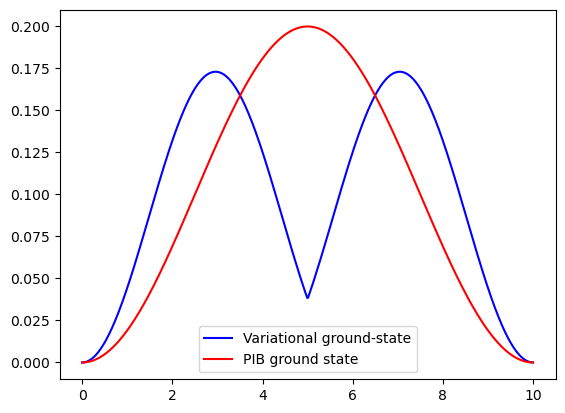

In [6]:
# initialize a numpy array for Phi_gs as an array of zeros with the same length as the x-axis used in the first cell
Phi_gs = np.zeros_like(x)

# loop through the basis states and add c_n \psi_n(x) to Phi_gs 
for i in range(n_basis):
    n = i + 1
    Phi_gs += c_opt[i,0] * energy_eigenfunction(n, 10, x)
    
# now plot the variational ground state along with the ground-state of the ordinary PIB
plt.plot(x, Phi_gs ** 2, "blue", label="Variational ground-state")
plt.plot(x, energy_eigenfunction(1, 10, x) ** 2, "red", label="PIB ground state")
# optionally plot the delta potential
#plt.plot(x, V_x, "purple", label="Potential")
plt.legend()

### Questions Part 2:
1.  Is the energy you calculated above higher or lower than the ground state energy of the ordinary particle in a box system (without the delta function potential)?
2.  Why do you think mixing in functions that correspond to excited states in the ordinary particle in a box system actually helped to improve (i.e. lower) your energy in the system with the delta function potential?
3.  Increase the number of basis functions to 50 (so that ${\bf H}$ is a 50x50 matrix and ${\bf c}$ is a vector with 50 entries) and repeat your calculation of the variational estimate of the ground state energy.  Does the energy improve (lower) compared to what it was when 3 basis functions were used?